Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

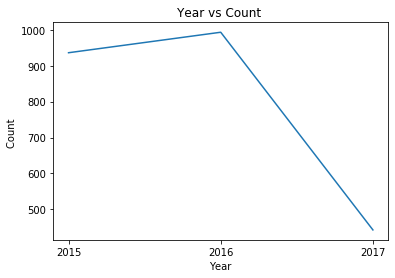

2015 936
2016 993
2017 443


In [1]:
# Number of Funding
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

year=[]
for row in file_list:
    year.append( row['Date'][-4:] )
    
np_year = np.array(year)

year,count = np.unique(np_year,return_counts=True)

plt.plot(year,count)
plt.xlabel('Year')
plt.ylabel('Count ')
plt.title('Year vs Count ')
plt.show()

for i in range(len(year)):
    print( year[i] , count[i] )
    

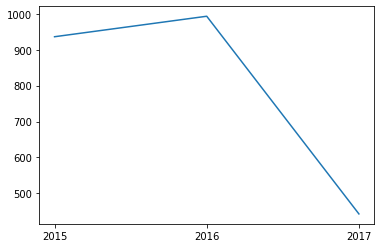

2015 936
2016 993
2017 443


In [22]:
# Number of Funding
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Datasets/startup_funding.csv',index_col='SNo')
df['Date'] = df['Date'].apply(lambda x : x[-4::])
year_count=df['Date'].value_counts()
year_count.sort_index(inplace=True)
plt.plot( year_count.index , year_count.loc[ year_count.index ])
plt.show()

for i in range(len(year_count)):
    print( year_count.index[i] , year_count[i]  )

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


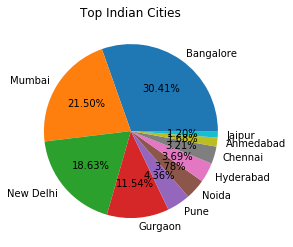

In [3]:
# Top Indian Cities
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )
    
d={}
for row in file_list:
    city = row['CityLocation'].strip()
    if '/' in city:
        city1 = city.split('/')[0].strip()
        d[city1] = d.get(city1,0) + 1
    else:
        d[city] = d.get(city,0) + 1

d['Bangalore'] += d.get('bangalore',0)
d['New Delhi'] += d.get('Delhi',0)
del d['bangalore']
del d['Delhi']
del d['']
d = sorted(d.items(),key=lambda x:x[1],reverse=True)[:10]
for k,v in d:
    print(k,v) 
    

d = dict(d)
plt.pie( d.values(), labels=d.keys() ,autopct='%0.2f%%'  )
plt.title('Top Indian Cities')
plt.show()



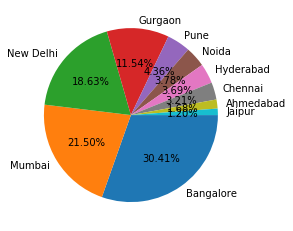

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [55]:
# Top Indian Cities
import matplotlib.pyplot as plt
import pandas as pd
def f(s):
    s=str(s)
    if '/' in s:
        return s.split('/')[0].strip()
    return s.strip()
df = pd.read_csv('../Datasets/startup_funding.csv',index_col = 'SNo')
df['CityLocation'].dropna(inplace=True)
df['CityLocation']=df['CityLocation'].replace('bangalore','Bangalore')
df['CityLocation']=df['CityLocation'].replace('Delhi','New Delhi')
df['CityLocation']=df['CityLocation'].apply(f)
df['CityLocation'].drop( df[df['CityLocation']=='nan'].index ,inplace=True)
top_city=df['CityLocation'].value_counts().nlargest(10)

plt.pie(top_city,autopct='%.2f%%',labels=top_city.index,counterclock=False)
plt.show()

for i in range(len(top_city)):
    print( top_city.index[i] , top_city[i] )

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


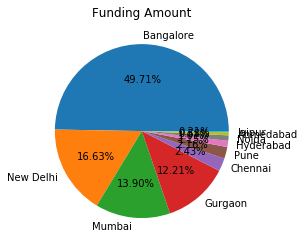

In [4]:
# Funding amount
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

city=[]
funding=[]
for row in file_list:
    if '/' in row['CityLocation']:
        city.append( row['CityLocation'].split('/')[0].strip())
    else:
        city.append(row['CityLocation'].strip())
    funding.append(row['AmountInUSD'].replace(',',''))

np_city = np.array(city)
np_city[np_city=='bangalore'] = 'Bangalore'
np_city[np_city=='Delhi'] = 'New Delhi'
np_funding = np.array(funding)
np_funding[np_funding==''] = '0'
np_funding=np.array(np_funding,dtype=int)

d={}
for c in np.unique(np_city):
    d[c] = d.get(c,0) + np_funding[c==np_city].sum()
del d['']
d = sorted(d.items(),key=lambda x:x[1],reverse=True)[:10]
d=dict(d)
total = sum(d.values())
for i in d:
    print(i, format(round(d[i]/total * 100,2),'.2f') )
plt.pie( d.values(), labels=d.keys() ,autopct='%0.2f%%'  )
plt.title('Funding Amount')
plt.show()

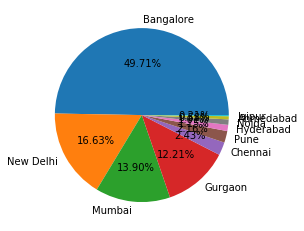

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [83]:
# Funding Amount
import matplotlib.pyplot as plt
import pandas as pd
def f(s):
    s=str(s)
    if '/' in s:
        return s.split('/')[0].strip()
    return s.strip()
df = pd.read_csv('../Datasets/startup_funding.csv',index_col = 'SNo')
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)
df['CityLocation']=df['CityLocation'].replace('bangalore','Bangalore')
df['CityLocation']=df['CityLocation'].replace('Delhi','New Delhi')
df['CityLocation']=df['CityLocation'].apply(f)
df['CityLocation'].drop( df[df['CityLocation']=='nan'].index ,inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : int(x.replace(',','')) )
city_group = df.groupby('CityLocation')

top_10 = city_group['AmountInUSD'].apply(lambda x: x.sum()).nlargest(10)
top_10 = round(top_10 / sum(top_10) * 100,2)
plt.pie(top_10,labels=top_10.index,autopct='%.2f%%')
plt.show()
for i in range(len(top_10)):
    print( format(top_10.index[i]) , format(top_10[i],'.2f') )

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


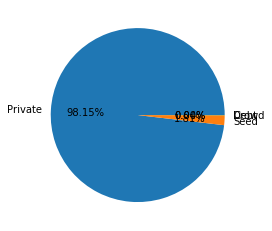

In [5]:
# Investment Type
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

types=[]
amount=[]
for row in file_list:
    amount.append(row['AmountInUSD'].replace(',',''))
    types.append(row['InvestmentType'])
    
amount = np.array(amount)
types = np.array(types)

amount[amount=='']='0'
amount = np.array(amount,dtype=int)

unique_type = np.unique(types)
d={}
for t in unique_type:
    d[t] = d.get(t,0) + amount[types==t].sum()
    
del d['']
d['Crowd Funding'] +=d['Crowd funding']
d['Private Equity'] +=d['PrivateEquity']
d['Seed Funding'] +=d['SeedFunding']

del d['Crowd funding']
del d['PrivateEquity']
del d['SeedFunding']

d = sorted(d.items(),key=lambda x:x[1],reverse=True)
d=dict(d)
total = sum(d.values())
for i in d:  
    print( i, format( round( d[i] / total * 100 , 2  ) ,'0.2f'  )  )
    
    
plt.pie( d.values() , labels=['Private','Seed','Debt','Crowd'], autopct='%.2f%%')
plt.xticks(rotation=90)
plt.show()


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.0


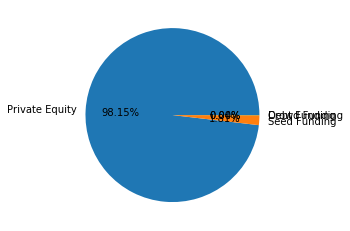

In [98]:
# Investment type
import matplotlib.pyplot as plt
import pandas as pd
def f(s):
    s=str(s)
    if '/' in s:
        return s.split('/')[0].strip()
    return s.strip()
df = pd.read_csv('../Datasets/startup_funding.csv',index_col = 'SNo')
df.dropna( subset=['InvestmentType','AmountInUSD'],inplace=True)
df['InvestmentType'] = df['InvestmentType'].replace({
    'SeedFunding' : 'Seed Funding',
    'PrivateEquity': 'Private Equity',
    'Crowd funding': 'Crowd Funding' 
})

df['AmountInUSD'] = df['AmountInUSD'].apply( lambda x :int( x.replace(',','') ) )
total_amount = df['AmountInUSD'].sum()
type_group = df.groupby(['InvestmentType'])

type_amount=type_group['AmountInUSD'].apply(lambda x: round(x.sum() / total_amount * 100,2) )
type_amount.sort_values(ascending=False,inplace=True)

for i in range(len(type_amount)):
    print(type_amount.index[i],type_amount[i])

plt.pie(type_amount,labels=type_amount.index ,autopct='%.2f%%', )
plt.show()

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


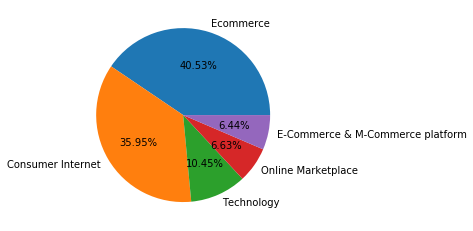

In [6]:
# Top Industries
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

types=[]
amount=[]
for row in file_list:
    amount.append(row['AmountInUSD'].replace(',',''))
    types.append(row['IndustryVertical'])
    
amount = np.array(amount)
types = np.array(types)

amount[amount=='']='0'
amount = np.array(amount,dtype=int)

unique_type = np.unique(types)
d={}
for t in unique_type:
    d[t] = d.get(t,0) + amount[types==t].sum()
    
d['Ecommerce'] += (d['eCommerce'] + d['ECommerce'] + d['ecommerce'])  
del d['']
del d['eCommerce']
del d['ECommerce']
d = sorted(d.items(),key=lambda x:x[1],reverse=True)[:5]
d=dict(d)
total = sum(d.values())
for i in d:  
    print( i, format( round( d[i] / total * 100 , 2  ) ,'0.2f'  )  )


plt.pie(d.values() ,labels=d.keys(),autopct='%.2f%%')
plt.xticks(rotation=40)
plt.show()

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


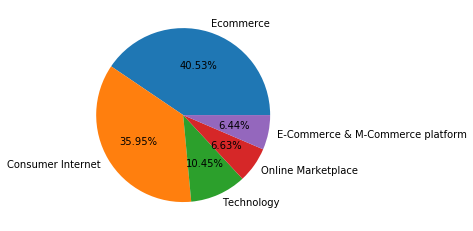

In [110]:
# Top Industries
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Datasets/startup_funding.csv',index_col = 'SNo')
df.dropna( subset=['IndustryVertical','AmountInUSD'] ,inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : int(x.replace(',','')))
df['IndustryVertical'] = df['IndustryVertical'].replace({
    'eCommerce' : 'Ecommerce',
    'ECommerce' : 'Ecommerce',
    'ecommerce' : 'Ecommerce',
})

industry_group = df.groupby(['IndustryVertical'])

industries =  industry_group['AmountInUSD'].apply( lambda x : x.sum())
industries.sort_values(ascending=False,inplace=True)
top_5 = industries.nlargest(5)
total_amount = top_5.sum()
top_5 = round(top_5 / total_amount * 100,2)
for i in range(len(top_5)):
    print( top_5.index[i] , top_5[i] )

plt.pie( top_5 ,labels= top_5.index , autopct='%.2f%%' )
plt.show()

In [7]:
# Top Startup
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

types=[]
amount=[]
for row in file_list:
    amount.append(row['AmountInUSD'].replace(',',''))
    types.append(row['StartupName'])
    
amount = np.array(amount)
types = np.array(types)

amount[amount=='']='0'
amount = np.array(amount,dtype=int)

unique_type = np.unique(types)
d={}
for t in unique_type:
    d[t] = d.get(t,0) + amount[types==t].sum()
    
d['Ola'] += (d['Ola Cabs'] + d['Olacabs'])  
d['Oyo'] += (d['Oyo Rooms'] + d['OyoRooms'] + d['Oyorooms'])  
d['Flipkart'] += (d['Flipkart.com'] )  
d['Paytm'] += (d['Paytm Marketplace'])  

del d['Flipkart.com']
d = sorted(d.items(),key=lambda x:x[1],reverse=True)[:5]

for i in d:
    print(i[0])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [120]:
# Top Startup
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Datasets/startup_funding.csv',index_col='SNo')
df.dropna(subset=['StartupName','AmountInUSD'],inplace=True)
df['StartupName'] = df['StartupName'].replace({
    'Oyo Rooms' : 'Oyo',
    'OyoRooms' : 'Oyo',
    'Oyorooms' : 'Oyo',
    'Ola Cabs' : 'Ola',
    'Olacabs' : 'Ola',
    'Flipkart.com' : 'Flipkart',
    'Paytm Marketplace' : 'Paytm'
})
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : int(x.replace(',','')))

startup_group = df.groupby('StartupName')
startup_amount=startup_group['AmountInUSD'].apply(lambda x : x.sum()).nlargest(5)
for i in startup_amount.index:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


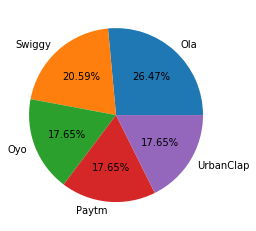

In [8]:
# Funding Rounds
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

types=[]
for row in file_list:
    types.append(row['StartupName'])
    
types = np.array(types)


unique_type,count = np.unique(types,return_counts=True)
d={}
for t in range(len(unique_type)):
    d[unique_type[t]] = d.get( unique_type[t]  ,0) + count[t] 

    
d['Ola'] += (d['Ola Cabs'] + d['Olacabs'])  
d['Oyo'] += (d['Oyo Rooms'] + d['OyoRooms'] + d['Oyorooms'] +d['OYO Rooms'] )  
d['Flipkart'] += (d['Flipkart.com'] )  
d['Paytm'] += (d['Paytm Marketplace'])  
d = sorted(d.items(),key=lambda x:x[1],reverse=True)[:5]
for k,v in d:
    print(k,v)
d = dict(d)
plt.pie(d.values() ,labels=d.keys(),autopct='%.2f%%')
plt.show()

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


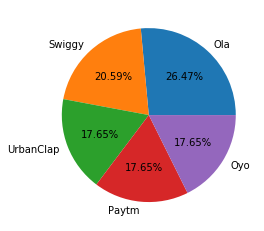

In [127]:
# Funding Round
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Datasets/startup_funding.csv',index_col='SNo')
df.dropna(subset=['StartupName'],inplace=True)
df['StartupName'] = df['StartupName'].replace({
    'Oyo Rooms' : 'Oyo',
    'OyoRooms' : 'Oyo',
    'Oyorooms' : 'Oyo',
    'OYO Rooms' :'Oyo',
    'Ola Cabs' : 'Ola',
    'Olacabs' : 'Ola',
    'Flipkart.com' : 'Flipkart',
    'Paytm Marketplace' : 'Paytm'
})

funding_round = df['StartupName'].value_counts().nlargest(5)
for i in range(len(funding_round)):
    print( funding_round.index[i] , funding_round[i] )
    
plt.pie( funding_round , labels= funding_round.index , autopct='%0.2f%%' )
plt.show()

In [133]:
# Top Investor
import matplotlib.pyplot as plt
import csv
import numpy as np

with open('../Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    file_list = list( file_data )

name=[]
for row in file_list:
    if ',' in row['InvestorsName']:
        names = row['InvestorsName'].split(',')
        for i in names:
            name.append(i.strip())
    else:
        name.append(row['InvestorsName'].strip())
    
name = np.array(name)
unique_names,count = np.unique(name,return_counts=True)

print( unique_names[count==count.max()][0],count.max() )

Sequoia Capital 64
